# <font color='#eb3483'> COMPAS ANALYSIS </font>


Our group analyzed the COMPAS Dataset to understand criminal recidivism more clearly.

We hypothesized that a machine learning analysis of the COMPAS Two-Year Excel Spreadsheets would describe a higher likelihood of African-American surveyors 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('compas-analysis-master/compas-scores-two-years.csv') 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

#This makes all of our graphs show up in our notebook when they're made
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sns.set(rc={'figure.figsize':(6,5)}) 
%matplotlib inline

## <font color='#eb3483'> Introduction </font>


### <font color='#eb3483'> Understanding the Initial Dataset </font>

In [2]:
df.head()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,is_recid,is_violent_recid,decile_score.1,...,r_charge_degree_(MO3),vr_charge_degree_(F1),vr_charge_degree_(F2),vr_charge_degree_(F3),vr_charge_degree_(F5),vr_charge_degree_(F6),vr_charge_degree_(F7),vr_charge_degree_(M1),vr_charge_degree_(M2),vr_charge_degree_(MO3)
0,69,0,1,0,0,0,-1.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,34,0,3,0,0,0,-1.000000,1,1,3,...,0,0,0,1,0,0,0,0,0,0
2,24,0,4,0,1,4,-1.000000,1,0,4,...,0,0,0,0,0,0,0,0,0,0
3,23,0,8,1,0,1,3.304763,0,0,8,...,0,0,0,0,0,0,0,0,0,0
4,43,0,1,0,0,2,3.304763,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.tail()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,is_recid,is_violent_recid,decile_score.1,...,r_charge_degree_(MO3),vr_charge_degree_(F1),vr_charge_degree_(F2),vr_charge_degree_(F3),vr_charge_degree_(F5),vr_charge_degree_(F6),vr_charge_degree_(F7),vr_charge_degree_(M1),vr_charge_degree_(M2),vr_charge_degree_(MO3)
7209,23,0,7,0,0,0,-1.0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
7210,23,0,3,0,0,0,-1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
7211,57,0,1,0,0,0,-1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7212,33,0,2,0,0,3,-1.0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
7213,23,0,4,0,0,2,-2.0,1,0,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(7214, 45)

In [5]:
df.columns

Index(['age', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'is_recid', 'is_violent_recid', 'decile_score.1', 'v_decile_score',
       'priors_count.1', 'start', 'end', 'event', 'two_year_recid',
       'sex_Female', 'sex_Male', 'race_African-American', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other',
       'c_charge_degree_F', 'c_charge_degree_M', 'r_charge_degree_(CO3)',
       'r_charge_degree_(F1)', 'r_charge_degree_(F2)', 'r_charge_degree_(F3)',
       'r_charge_degree_(F5)', 'r_charge_degree_(F6)', 'r_charge_degree_(F7)',
       'r_charge_degree_(M1)', 'r_charge_degree_(M2)', 'r_charge_degree_(MO3)',
       'vr_charge_degree_(F1)', 'vr_charge_degree_(F2)',
       'vr_charge_degree_(F3)', 'vr_charge_degree_(F5)',
       'vr_charge_degree_(F6)', 'vr_charge_degree_(F7)',
       'vr_charge_degree_(M1)', 'vr_charge_degree_(M2)',
       'vr_charge_degree_(MO3)'

In [6]:
df.dtypes

age                          int64
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
is_recid                     int64
is_violent_recid             int64
decile_score.1               int64
v_decile_score               int64
priors_count.1               int64
start                        int64
end                          int64
event                        int64
two_year_recid               int64
sex_Female                   int64
sex_Male                     int64
race_African-American        int64
race_Asian                   int64
race_Caucasian               int64
race_Hispanic                int64
race_Native American         int64
race_Other                   int64
c_charge_degree_F            int64
c_charge_degree_M            int64
r_charge_degree_(CO3)        int64
r_charge_degree_(F1)         int64
r_charge_degree_(F2)

### <font color='#eb3483'> Unnecessary/Duplicate Column Removal </font>

In [8]:
#del_col_list = ['r_days_from_arrest','c_days_from_compas','violent_recid','id', 'c_case_number','r_case_number', 'vr_case_number','name', 'first', 'last', 'compas_screening_date', 'dob', 'age_cat', 'c_jail_in','c_jail_out', 'c_offense_date', 'c_arrest_date', 'c_charge_desc', 'r_case_number', 'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out', 'vr_case_number', 'vr_offense_date', 'vr_charge_desc', 'type_of_assessment', 'score_text', 'screening_date', 'v_type_of_assessment', 'v_score_text', 'v_screening_date', 'in_custody', 'out_custody'] 

#df = df.drop(del_col_list, axis=1)
#df.head

In [9]:
print(df.shape)

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]

print(duplicate_rows_df.shape)

(7214, 45)
(1, 45)


In [420]:
#df = pd.get_dummies(data=df, columns=["sex", "race", "c_charge_degree", "r_charge_degree", "vr_charge_degree"])

In [421]:
#df.days_b_screening_arrest = df.days_b_screening_arrest.fillna(df.days_b_screening_arrest.mean())

In [10]:
df.head()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,is_recid,is_violent_recid,decile_score.1,...,r_charge_degree_(MO3),vr_charge_degree_(F1),vr_charge_degree_(F2),vr_charge_degree_(F3),vr_charge_degree_(F5),vr_charge_degree_(F6),vr_charge_degree_(F7),vr_charge_degree_(M1),vr_charge_degree_(M2),vr_charge_degree_(MO3)
0,69,0,1,0,0,0,-1.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,34,0,3,0,0,0,-1.000000,1,1,3,...,0,0,0,1,0,0,0,0,0,0
2,24,0,4,0,1,4,-1.000000,1,0,4,...,0,0,0,0,0,0,0,0,0,0
3,23,0,8,1,0,1,3.304763,0,0,8,...,0,0,0,0,0,0,0,0,0,0
4,43,0,1,0,0,2,3.304763,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## <font color='#eb3483'> Understanding The Top Offenders </font>

In [11]:
top_reoffenders = df.sort_values(by ='priors_count', ascending=False).head()
top_reoffenders

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,is_recid,is_violent_recid,decile_score.1,...,r_charge_degree_(MO3),vr_charge_degree_(F1),vr_charge_degree_(F2),vr_charge_degree_(F3),vr_charge_degree_(F5),vr_charge_degree_(F6),vr_charge_degree_(F7),vr_charge_degree_(M1),vr_charge_degree_(M2),vr_charge_degree_(MO3)
6825,45,0,8,0,0,38,-1.0,1,1,8,...,0,0,0,1,0,0,0,0,0,0
2058,58,0,7,0,0,38,-112.0,1,0,7,...,0,0,0,0,0,0,0,0,0,0
2186,38,0,7,5,0,37,-1.0,1,1,7,...,0,0,0,1,0,0,0,0,0,0
328,53,0,6,0,0,36,-7.0,1,0,6,...,0,0,0,0,0,0,0,0,0,0
4374,39,0,10,0,0,35,-45.0,0,0,10,...,0,0,0,0,0,0,0,0,0,0


In [12]:
def find_min_max_in(col):
    top = df[col].idxmax()
    top_df = pd.DataFrame(df.loc[top])
    
    bottom = df[col].idxmin()
    bottom_df = pd.DataFrame(df.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('priors_count')

,2058,0
age,58.0,69.0
juv_fel_count,0.0,0.0
decile_score,7.0,1.0
juv_misd_count,0.0,0.0
juv_other_count,0.0,0.0
priors_count,38.0,0.0
days_b_screening_arrest,-112.0,-1.0
is_recid,1.0,0.0
is_violent_recid,0.0,0.0
decile_score.1,7.0,1.0


### <font color='#eb3483'> Linear Regression </font>

In [13]:
y=df['priors_count']
X=df.drop('priors_count', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [14]:
print('X train', X_train.shape)
print('y train', y_train.shape)
print('X test', X_test.shape)
print('y test', y_test.shape)

X train (5771, 44)
y train (5771,)
X test (1443, 44)
y test (1443,)


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
LinearRegression

sklearn.linear_model._base.LinearRegression

In [17]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
model.fit(y=y_train, X=X_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
model.intercept_

5.906386491005833e-14

In [20]:
model.coef_

array([-3.41994706e-15, -1.82882190e-14,  2.11039596e-15,  8.21685816e-15,
        2.82870943e-16, -2.42986870e-16,  1.41199575e-14, -1.46433483e-15,
        4.44208115e-15, -4.75102011e-16,  1.00000000e+00,  7.34153229e-17,
        4.26357987e-17,  3.89522082e-17,  2.38619192e-16,  7.64444801e-17,
       -8.89346076e-17,  5.02152634e-16,  1.10503521e-16, -2.88625792e-16,
       -2.43626528e-17, -3.11494216e-16,  1.17164273e-16, -1.03910867e-16,
        9.52372499e-17,  1.60080282e-15,  1.59400877e-15,  1.41012519e-15,
        1.62827862e-15,  8.56426589e-16,  1.44856962e-15,  1.26780102e-15,
        1.65718576e-15,  1.54920896e-15,  1.49857276e-15, -1.92115864e-16,
       -8.17457368e-17, -2.62072473e-16,  8.56318169e-16, -2.80313777e-16,
       -2.46966630e-16,  7.20200714e-17, -1.39510665e-16, -2.94696929e-16])

In [21]:
predictions = model.predict(X_test)

In [22]:
for y, y_pred in list(zip(y_test, predictions))[:5]:
    print("Real value: {:.3f} Estimated value: {:.5f}".format(y, y_pred))

Real value: 0.000 Estimated value: 0.00000
Real value: 1.000 Estimated value: 1.00000
Real value: 7.000 Estimated value: 7.00000
Real value: 0.000 Estimated value: -0.00000
Real value: 2.000 Estimated value: 2.00000


In [23]:
X = X_test.reset_index().copy() # make a copy of indices and data
X["target"] = y_test.tolist()
X["prediction"] = predictions
X.head()

,index,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,days_b_screening_arrest,is_recid,is_violent_recid,decile_score.1,...,vr_charge_degree_(F2),vr_charge_degree_(F3),vr_charge_degree_(F5),vr_charge_degree_(F6),vr_charge_degree_(F7),vr_charge_degree_(M1),vr_charge_degree_(M2),vr_charge_degree_(MO3),target,prediction
0,591,21,0,7,0,0,-1.0,0,0,7,...,0,0,0,0,0,0,0,0,0,6.821398e-14
1,4049,45,0,1,0,0,-4.0,0,0,1,...,0,0,0,0,0,0,0,0,1,1.000000e+00
2,3779,65,0,5,0,0,-1.0,0,0,5,...,0,0,0,0,0,0,0,0,7,7.000000e+00
3,1010,53,0,1,0,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,-8.182405e-14
4,6098,30,0,2,0,0,-1.0,0,0,2,...,0,0,0,0,0,0,0,0,2,2.000000e+00


In [24]:
type(X)

pandas.core.frame.DataFrame

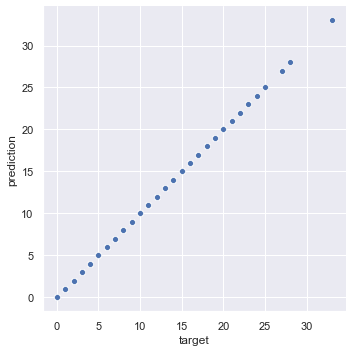

In [25]:
sns.relplot(x="target", y="prediction", data=X, kind="scatter")

## <font color='#eb3483'> Logistical Regression </font>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
#sns.pairplot(df)

In [ ]:
from ipywidgets import interact, fixed

#Create our plotting function
def plotRecidivismPercent(df, col):
    #Check out what average recidivism is for each potential value in a collumn
    df.groupby(col).agg({'Two_yr_Recidivism':np.mean}).plot.barh()

#Let's look at all columns (you might want to drop numeric columns 
#that aren't binary but you can also just ignore that graph)
columns_to_plot = df.drop('Two_yr_Recidivism',axis=1).columns
interact(plotRecidivismPercent, 
         col=columns_to_plot, df1=fixed(df));

In [ ]:
#Get our data into the right format
X = df.drop('Two_yr_Recidivism', axis=1)
Y = df['Two_yr_Recidivism']
X_tr, X_test, Y_tr, Y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
Y_tr

In [ ]:
#Instantiate our logistic regression model
logreg = LogisticRegression()

#Fit our training data
logreg.fit(X_tr, Y_tr)

#Predict on our test data
predictions = logreg.predict(X_test)

predictions[:10]

In [ ]:
#Check accuracy
print("Accuracy: ", (predictions == Y_test).mean())

In [ ]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
cross_val_score(logreg, X, Y, scoring="accuracy", 
                cv=10).mean()

In [ ]:
logreg = LogisticRegression()
cross_val_score(logreg, X, Y, scoring="roc_auc", 
                cv=10).mean()

In [ ]:
logreg = LogisticRegression()

#Fit our training data
logreg.fit(X_tr, Y_tr)

#Predict on our test data
for col in ['African_American', 'Asian', 'Hispanic', 'Native_American', 'Other']:
    predictions = logreg.predict(X_test[X_test[col] == 1])
    print("Accuracy (%s): "%col, (predictions == Y_test[X_test[col] == 1]).mean())